<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/RNN_Forward_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recurrent Neural Network-**

RNN is a type of neural network which is used when we have a sequential data like text. Sequence of text data can be different each time. Sequential data means that our sequence contains some meaning. Consider any text sentence , the sequence of words matters otherwise meaning of the senctence may differ.In ANN , we give input data together so the information loss is there of sequnce data.RNN's are special type of neural network which has memory component in it which remembers the sequnce of input data.

**Data for RNN-**

Whenever we input the data to RNN , that data is in the form of (timesteps , input_feature). Let we are working on the sentimental analysis problem of reviews of a movie. We have revews in english and we have sentiment as 0 for bad and 1 for good.WHenever we feed data to RNN , we convert this data into vectors because RNN dont understand English.We will use one-hot-encoding to convert the english text into vectors as below.When we send 1st review vectores , that time we have time stamp as 1 , when we send 2nd review to the model , that time we have time stamp of 2 and so on.

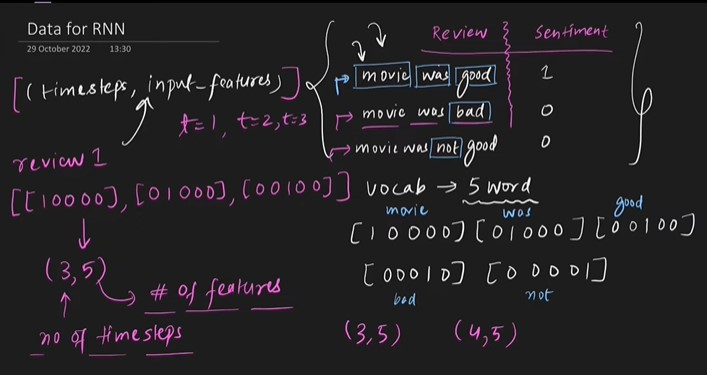

There is a simplernn class in keras where we will send the data in the form of (batch_size , timestamp, input_features). This batch_size means we will send multiple reviews at once to the RNN model.

**How RNN works?**

Lets consider a sentiment analysis of movie review where good is 1 and bad is 0.We have 3 reviews in total with 1st as x1 , 2nd review as x2 and 3rd review as x3.x11 is 1st word of x1 , x12 is 2nd word of x1 , x13 is 3rd word of x1. We convert the english text data into vector numbers because RNN can not understand english.

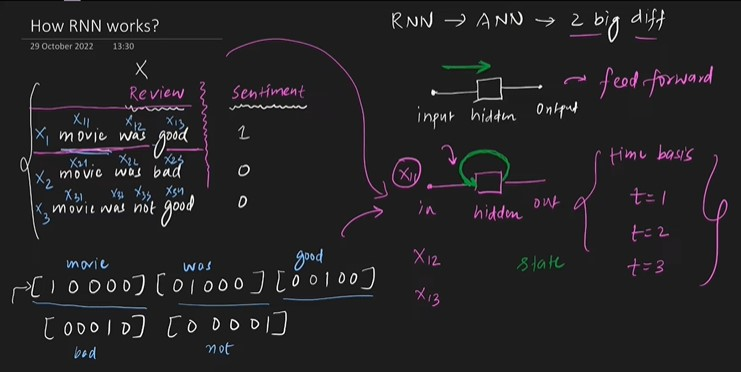

RNN and CNN are kind of similar.In CNN we have input then hidden layer and output layer and in RNN also we have input layer , hidden layer and output layer.The difference is that how you give input data to the model.In RNN we give each word one by one and take the output . at time 1 we give x11 , at time 2 we give x12 , at time 3 we give x13.SO we give input in RNN on time basis.

ANN is the feed forward neural network.And In RNN , hidden layer comes back and send feedback which makes the most important part of RNN.



Considering the same above problem,we will require 5 nodes in input layer because there are 5 different words are there in dataset . (movie,was,good,bad,not).Now we have to add hiden layer. We will add hidden layer of 3 nodes(we can add 4 ,5 or whatever we want).Then there will be output node at output layer with sigmoid activation function.Three nodes that we defined in hidden layer are connected to the output layer. The output of these 3 hidden nodes will work as the input to itself as well as to the other two hidden nodes for time stamp 2 which means at time stamp 1 we are giving input word x11 to the network. At time stamp 2 , we give input x12 so when we are giving input x12 to the model, it is coming with the output of time stamp 1 also.And this will happen for each node.

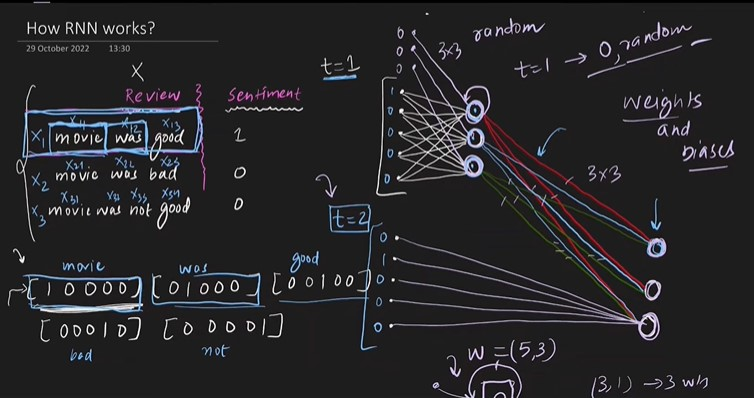

So how many trainable parameters will be there in this model architecture?

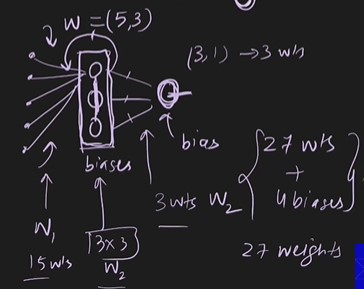

We have input of size 5 to the hidden layer having 3 nodes. So these 5 * 3 = 15 weights. Three hidden nodes are connected to the one output node , these 3 weights. We have 3 bias in hidden node and 1 bias in output node. Total 4 bias. Each hidden node is giving input to itself along with other 2 nodes so there will be 3 * 3 = 9 weights . Hence in total we have - 15 + 3+ 4(biases) + 9 = 27 weigths and 4 biases

**We will implement RNN in Keras**

In [12]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN

In [13]:
model = Sequential()
model.add(SimpleRNN(3,input_shape=(4,5)))
model.add(Dense(1,activation='sigmoid'))
model.summary()
#Observe total trainable parameters are 31 (27 weights and 4 biases)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:

print(model.get_weights()[0].shape)
model.get_weights()[0] #This line will print the values of all the weights

(5, 3)


array([[-0.03800905, -0.54061174, -0.70302516],
       [-0.6314699 ,  0.78675157,  0.02248651],
       [ 0.11638194, -0.4410628 ,  0.09213024],
       [ 0.07828188,  0.683953  , -0.48931223],
       [ 0.33872885, -0.6336379 , -0.8165792 ]], dtype=float32)

In [15]:
print(model.get_weights()[3].shape)
model.get_weights()[3] #These are 3 biases of hidden layer nodes

(3, 1)


array([[-1.0270327 ],
       [ 0.3985517 ],
       [ 0.14268708]], dtype=float32)

In [16]:
print(model.get_weights()[4].shape)
model.get_weights()[4]  #This is bias of output layer node

(1,)


array([0.], dtype=float32)

**How Forward Propagation Happens In RNN-**

Consider the above problem of sentiment analysis of movie review. Here x11 , x12 ,x13 ....x32, x33 are words in the form of vectors something like this -[1,0,0,0,0]

When we perform forward propagation in RNN , there is a term called "Unfolding Through Time" which means each node in hidden layer will work as a loop.We will represnt hidden layer with one box.

At time equal to 1 we will send the first word that is x11.Shape of 1st word x11 is (1,5). We give x11 as input then there will dot product happen between x11 and weight input(wi) whose size is (5,3).Now in recurrent layer , each node will act as a neural network which means each node will be having its own activation function and by default it is tanh. Now we have dot product of (x11 * wi) and result of it is (1 * 3) and this output is passed through the tanh activation function.The output of this activation function will be our output1(o1) with size (1 * 3).

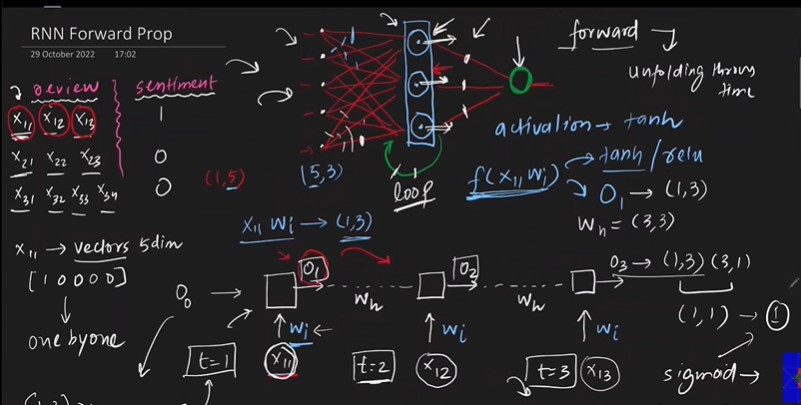

At time equal to 2, we will use the same network with same weights just we will send the second word x12. The main difference is that one more input will be there of the ouput of that node at time equal to 1.Which means o1 will also be one of the input to the node at time stamp 2.This o1 will go to the node with weighted connection of wh with size (3 *3). Now the same calculation will takes place inside , (x12wi + o1wh +b1) -->output will be (1 *3) and this value we will send through the activation function tanh which we call it as output2 (o2).

At time equal to 3 , we will use the same network with same weights  and we will send the 3rd word i.e.x13 through wi weight values. Along with this we will get the input o2 to this node.This o2 will go to node with weight values wh.NOw our operation will be (x13w1+o2wh+b1) and this value will be passed through the tanh activation function and this output we call as output3 (o3) with shape (1 * 3).

With this 3rd word our all words present in the dataframe is over. We passed x11 , x12 and x13 at 3 different time stamp. NOw we have output of these 3 words in form of o3. This o3 will be passed to the output layer through output layer weights whose size is (3 *1).Output of dot product of o3 and weights will be (1 * 1) which is nothing but a scaler value. We will apply sigmoid activation function on this scaler value.

And this is how we will be performing forward propagation.

Notice that at time 2 and time 3 we are getting input from itself and before node which means we are getting two inputs in time 2 and time 3. But at time 1 we are getting only one input . SO to be consistant in the process , we give random input to the node at time 1 with vector of values 0 or random values.

This is called recurrent neural network because our hidden layer is reoccur, We are changing the input word but we are using the same layer to calculate the output.We are giving new word at different time stamp but using the same weight values  which means there is a concept of parameter sharing or weight sharing.

RNN can process the hidden information in the sequence because if we observe the final output , we have one componet of each previous output stamps.A simple RNN can process a sequence of 10 time steps.



**Simplified Representation of RNN-**

We can consider a RNN like a box which gets two inputs.First input is xit where  i is row number and t represents time step and second input is o(t-1) which is nothing but the ouput of previous time stamp of the same node.xti goes to network with weight matrix wi and o(t-1) goes to network with weight matrix wh.We do dot product of xitwi and o(t-1)wh and add them. And we pass the result of addition in activation function. The result of activation function will be ot which is output of current time stmp. If the current time stamp is last one , then we send this output (ot) to wo . We do dot product of otwo and pass the result of dot product through the activation function(sigmoid because last time stamp).The result of this activation function will be our final result.

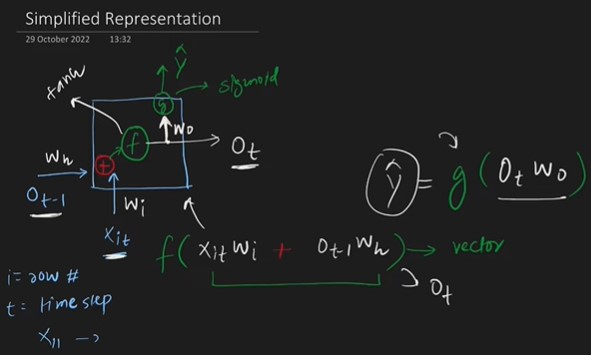